# First Analysis

This notebook processes and analyzes the output of `Tau_Map6_121323.m` via the `Asymm_v_T0_121323.csv` file.
This will eventually analyze `.mat` files from an updated version of the simulation code.

## Notebook Configuration

In [1]:
# import packages
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colormaps

from rich import print
from tqdm import tqdm

In [2]:
# configure plotting
# define the figure save directory
figure_dir = Path("figures")
os.makedirs(figure_dir, exist_ok=True)

# set plot style
cstyle_file_url = r"https://gist.githubusercontent.com/CalvinSprouse/30bba681da1dd0023e948ca207fad0fc/raw/80a1ae94031873a57c9624103e83f5caf175ac86/cstyle.mplstyle"
plt.style.use(["default", cstyle_file_url])

## Import Data

In [3]:
# import Asymm_v_T0_121323.csv from reference_code to a pandas dataframe
# define the data directory
data_dir = Path("reference_code")
# define the data file
data_file = data_dir / "Asymm_v_T0_121323.csv"
# read the data file
df = pd.read_csv(data_file)

In [4]:
# average the data but first group by T0/M0
df_grouped = df.groupby("T0/M0")
df_avg = df_grouped.mean()

## Plotting

### Define Functions

In [5]:
# add an argument to capture kwargs for ax.bar
def grouped_bar_plot(fig, ax,
                     group_data: dict,
                     group_labels: list,
                     colors: list = None,
                     bar_width: float = 0.2,
                     multiplier: float = 0,
                     **kwargs):
    """Plots a grouped bar plot

    Arguments:
        fig -- _description_
        ax -- _description_
        group_data -- _description_

    Keyword Arguments:
        colors -- _description_ (default: {None})
        bar_width -- _description_ (default: {0.2})
        multiplier -- _description_ (default: {0})

    Raises:
        ValueError: _description_

    Returns:
        _description_
    """

    # extract groups from keys of group_data
    group_count = len(group_labels)

    # the default value of colors should be a built in color list
    if colors is None:
        colors = colormaps["tab10"].colors
    else:
        # check if the length of colors is greater than the number of groups
        if len(colors) < group_count:
            raise ValueError("The number of colors provided is less than the number of groups")

    # define the label locations
    x_locations = np.arange(group_count)

    # plot the bars
    for index, attr_meas in enumerate(group_data.items()):
        # unpack attr_meas
        attribute = attr_meas[0]
        measurement = attr_meas[1]

        # calculate the offset location of each bar
        offset = bar_width * multiplier

        # draw the bar and insert kwargs
        ax.bar(
            x_locations + offset,
            measurement,
            bar_width,
            label=attribute,
            color=colors[index],
            **kwargs
        )

        # iterate the multiplier to space the next bar
        multiplier += 1

    # set the x ticks
    ax.set_xticks(x_locations + bar_width, group_labels)

    return fig, ax

### Binding Rate Ratio vs. MT Length

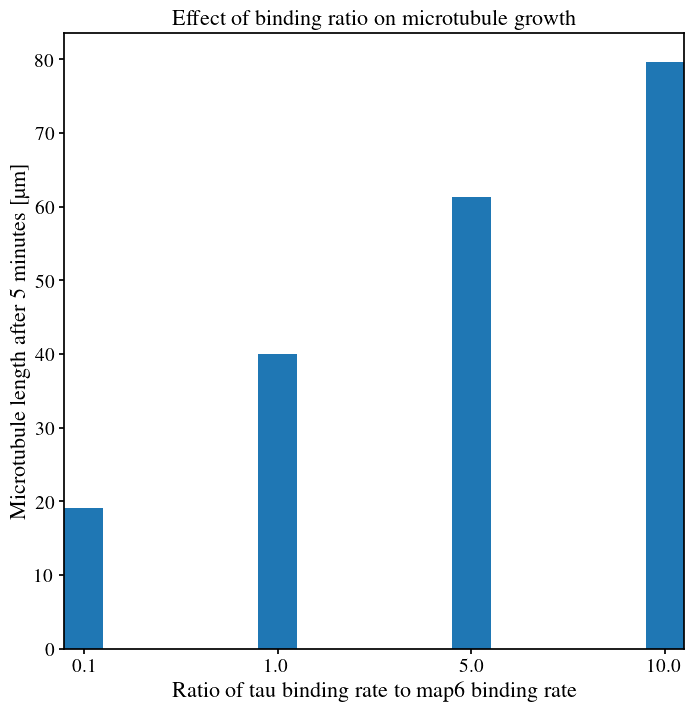

In [6]:
# define the grouped data and group labels
group_data = {"L": df_avg["L"]}
group_labels = df_avg.index

# define the figure
fig, ax = plt.subplots()

# plot the grouped bar plot
fig, ax = grouped_bar_plot(fig, ax, group_data, group_labels, multiplier=1)

# set the labels
ax.set_xlabel(r"Ratio of tau binding rate to map6 binding rate")
ax.set_ylabel(r"Microtubule length after 5 minutes [$\qty{}{\micro\meter}$]")
ax.set_title(r"Effect of binding ratio on microtubule growth")

# save the figure
fig.savefig(figure_dir / r"growth_effect")

### Binding Asymmetry

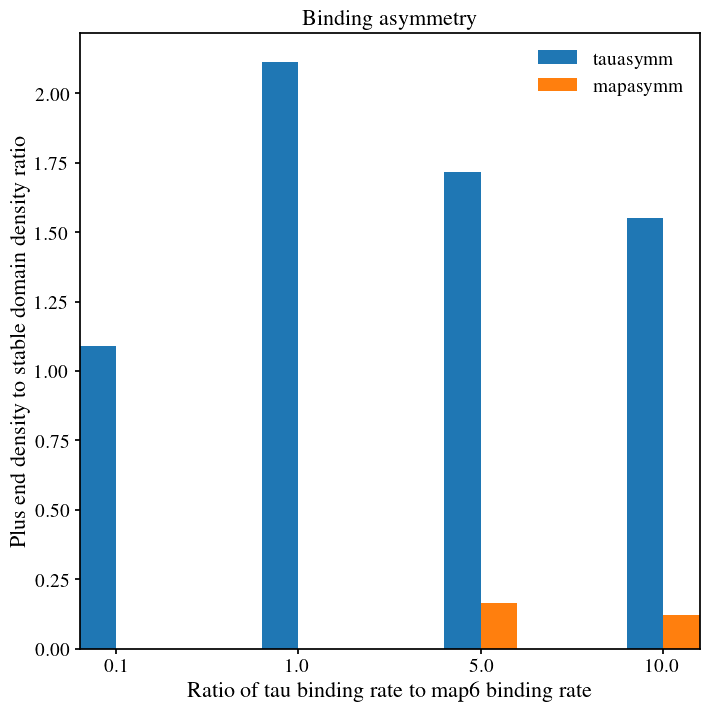

In [7]:
# make a grouped bar plot of binding asymmetry
# on the horizontal: ratio of tau binding rate to map6 binding rate
# on the vertical:
# 1. tau plus end density to stable domain density ratio (tauasymm), default blue
# 2. map6 plus end density to stable domain density ratio (mapasymm), default orange

# define the group data and group labels
group_data = {"tauasymm": df_avg["tauasymm"], "mapasymm": df_avg["mapasymm"]}
group_labels = df_avg.index

# define the figure
fig, ax = plt.subplots()

# plot the data
fig, ax = grouped_bar_plot(fig, ax, group_data, group_labels, multiplier=1/2)

# set the labels
ax.set_xlabel(r"Ratio of tau binding rate to map6 binding rate")
ax.set_ylabel(r"Plus end density to stable domain density ratio")
ax.set_title(r"Binding asymmetry")

# set the legend
ax.legend()

# save the figure
fig.savefig(figure_dir / r"asymm_effect")

### Distribution Dependence on tau On Rate

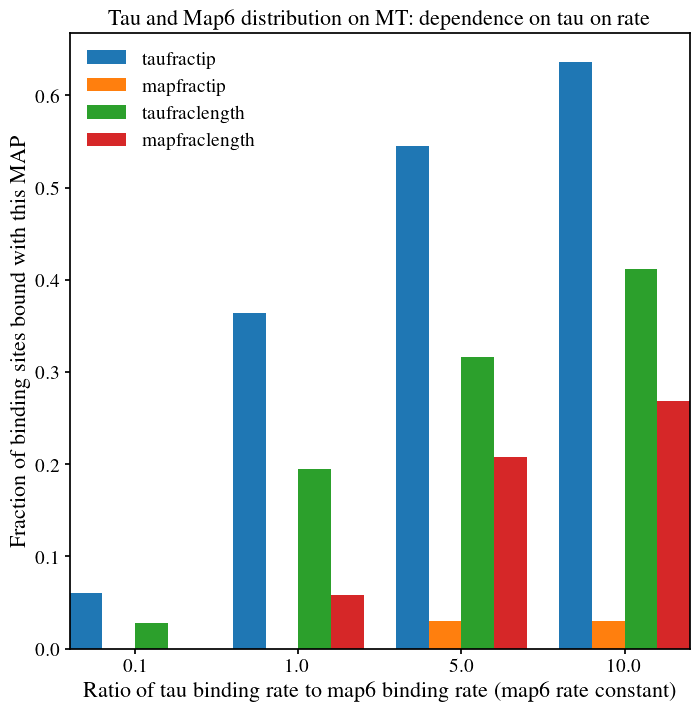

In [8]:
# make a grouped bar plot
# on the horizontal: ratio of tau binding rate to map6 binding rate
# on the vertical:
# 1. plus-end tau fraction (taufractip), orange
# 2. plus-end map6 fraction (mapfractip), blue
# 3. stable domain tau fraction (taufraclength), grey
# 4. stable domain map6 fraction (mapfraclength), green

# define the group data and group labels (T0/M0)
group_data = {
    "taufractip": df_avg["taufractip"],
    "mapfractip": df_avg["mapfractip"],
    "taufraclength": df_avg["taufraclength"],
    "mapfraclength": df_avg["mapfraclength"],
}
group_labels = df_avg.index

# define the colors
colors = ["orange", "blue", "grey", "green"]

# define the figure
fig, ax = plt.subplots()

# plot the data
fig, ax = grouped_bar_plot(fig, ax, group_data, group_labels, multiplier=-1/2)

# set the labels
ax.set_xlabel(r"Ratio of tau binding rate to map6 binding rate (map6 rate constant)")
ax.set_ylabel(r"Fraction of binding sites bound with this MAP")
ax.set_title(r"Tau and Map6 distribution on MT: dependence on tau on rate")

# add a legend
ax.legend()

# save the figure
fig.savefig(figure_dir / r"binding_distribution_grouped")